In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=1 , test_size = 0.1)

In [5]:
X_train.isnull().mean()*100

Age       20.099875
Fare       5.493134
Family     0.000000
dtype: float64

In [6]:
X_train['Age_median'] = X_train['Age'].fillna(X_train['Age'].median())
X_train['Age_mean'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train['Fare_median'] = X_train['Age'].fillna(X_train['Fare'].median())
X_train['Fare_mean'] = X_train['Age'].fillna(X_train['Fare'].mean())

In [7]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  216.96661348567093
Age Variance after median imputation:  173.59933919413234
Age Variance after mean imputation:  173.3020825216797
Original Fare variable variance:  2381.809487333049
Fare Variance after median imputation:  211.7331223308365
Fare Variance after mean imputation:  174.13483466536766


### IF DISTRIBUTION CHANGES TOO MUCH THEN IT WILL BE A 'RED FLAG'. MEANS WE MUST HAVE TO AVOID THAT TECHNIQUE .IN BOX PLOT WE CAN CLEARLY SEE THAT AFTER FILLING AGE'S MISSING VALUE THE OUTLIERS ARE INCREASED

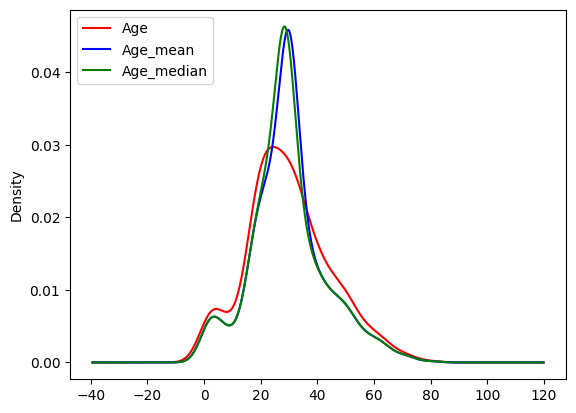

In [8]:
# Different types of Age

X_train['Age'].plot(kind = 'kde' , c ='r' , label = 'Age')
X_train['Age_mean'].plot(kind = 'kde' , c = 'b' , label = 'Age_mean')
X_train['Age_median'].plot(kind = 'kde' , c = 'g' , label = 'Age_median')
plt.legend(loc = 'upper left')

plt.show()



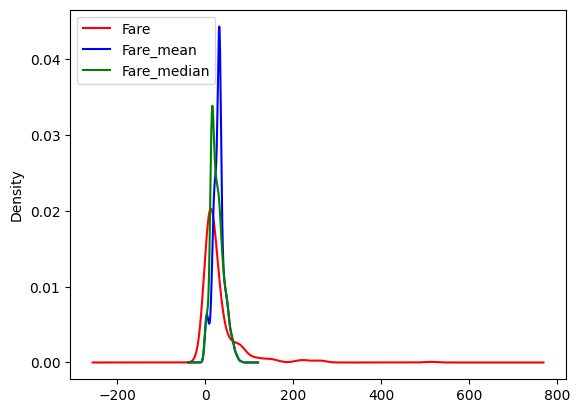

In [9]:
# Different types of Fare

X_train['Fare'].plot(kind = 'kde' , c ='r' , label = 'Fare')
X_train['Fare_mean'].plot(kind = 'kde' , c = 'b' , label = 'Fare_mean')
X_train['Fare_median'].plot(kind = 'kde' , c = 'g' , label = 'Fare_median')
plt.legend(loc = 'upper left')

plt.show()

In [10]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,216.966613,85.668631,-6.352877,216.966613,216.966613,216.966613,216.966613
Fare,85.668631,2381.809487,17.633128,70.647701,68.111009,96.954179,63.865207
Family,-6.352877,17.633128,2.360331,-5.023885,-5.074360,-4.500438,-5.158844
Age_median,216.966613,70.647701,-5.023885,173.599339,173.302083,176.682006,172.804547
Age_mean,216.966613,68.111009,-5.074360,173.302083,173.302083,173.302083,173.302083
Fare_median,216.966613,96.954179,-4.500438,176.682006,173.302083,211.733122,167.644916
Fare_mean,216.966613,63.865207,-5.158844,172.804547,173.302083,167.644916,174.134835


In [11]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.111276,-0.300201,1.000000,1.000000,1.000000,1.000000
Fare,0.111276,1.000000,0.232587,0.109193,0.105363,0.135664,0.098559
Family,-0.300201,0.232587,1.000000,-0.248187,-0.250896,-0.201314,-0.254462
Age_median,1.000000,0.109193,-0.248187,1.000000,0.999143,0.921561,0.993890
Age_mean,1.000000,0.105363,-0.250896,0.999143,1.000000,0.904706,0.997606
Fare_median,1.000000,0.135664,-0.201314,0.921561,0.904706,1.000000,0.873078
Fare_mean,1.000000,0.098559,-0.254462,0.993890,0.997606,0.873078,1.000000


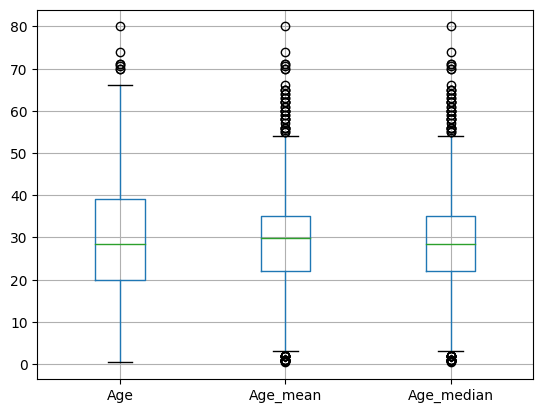

In [12]:
X_train[['Age' , 'Age_mean' , 'Age_median']].boxplot()
plt.show()

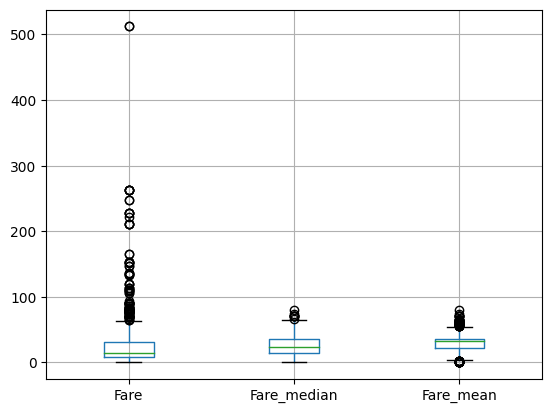

In [13]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()
plt.show()

In [21]:
# Using Imputer
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=1 , test_size = 0.1)

In [23]:

trf = ColumnTransformer([
    ('imputer1' , SimpleImputer(strategy='median') , ['Age']),
    ('imputer2' , SimpleImputer(strategy='mean') , ['Fare'])
    
] , remainder = 'passthrough')

In [24]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [27]:
trf.named_transformers_['imputer1'].statistics_ # (strategy='median') so .statistics_ gives mean value 

array([28.5])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([32.1353469])